# Netflix Shows & Movies EDA

In [72]:
# Data manipulation & cleaning
import pandas as pd

# EDA Vis
import matplotlib.pyplot as plt

# Any linear algebra problems
import numpy as np

# Library to make linear regression model - OLS/LR Vis etc.
import statsmodels.api as sm

# Libraries for regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# NLP - Natural Lang. Toolkit - need this library for movie/show reccomendation
import nltk # Won't usually require this, since you want specific packages, but for installation purposes - is required
import nltk.corpus # Corpus - collection of written text
from nltk.tokenize import word_tokenize # To tokenize any relevant strings
from nltk.probability import FreqDist # To find frequence of tokens, helpful for various EDA

# Saving any model(s)
import joblib

## Also import Make Regression from SkLearn - https://www.codespeedy.com/make_regression-function-in-sklearn-with-python/#:~:text=make_regression%20%28%29%20function%20in%20scikit%20learn%20It%20is,in%20python%20below.%20Code%20in%20Python%20programming%20language

In [32]:
# Downloading all recommended packages for NLTK
#nltk.download() # It's my first time using this library 

In [33]:
# Importing data and create a backup 
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\1. Netflix (Personal Proj) - ML Focus\netflix_titles.csv")
df_backup = df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [34]:
df.shape

(8807, 12)

#### Manipulation

In [35]:
# Count amount of null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [36]:
# Since null rows won't help us, we should just drop them - we have a backup, so it's okay
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [37]:
# Since null rows have been dropped, the original index will have messed up
# Reset index for new df
df.reset_index(inplace=True)

In [38]:
# Converting date-related data into datetime, to make it formatted to refer to for analysis
# Creating 2 new columns - Year & month, to open more analysis opportunities and more perspectives of date analysis
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# We want to move the columns since the new date columns are at the end 
# Having simillar data next to each other makes it easier to refer to}
d_a = df['date_added']
r_y = df['release_year']
moving_cols = ['r_y', 'd_a']

df = df[[c for c in df if c not in moving_cols] # You can manually write out the columns in the order you want
        + [c for c in moving_cols if c in df]] # This method save time - better for larger datasets

The code above mayn't apply to the end goal of this project, but we can use it for reference in future projects

In [39]:
df.drop(['index'], axis=1, inplace=True)

In [40]:
# Extracting columns for future reference
cols = df.columns 

In [41]:
# Shape of no null df, we have also have a backup.
df.shape

(5332, 14)

## TV Shows vs Movies - Data Extraction

Further into the notebook we will be looking at a recommendation system - so we need to extract this specific data 

In [42]:
# Distribution of content via type
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

# Resetting index for movie & show data
movies.reset_index(inplace=True)
tv_shows.reset_index(inplace=True)

movies.drop(['index'], axis=1, inplace=True) # Droppping 'Index' column since we just reset and created a new index.
tv_shows.drop(['index'], axis=1, inplace=True)

### EDA

In [43]:
# Print columns to get more aspects of the data to analyse
list(cols) # List makes it easier to read

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year_added',
 'month_added']

#### Distribution Of Movies vs TV Shows

([<matplotlib.patches.Wedge at 0x25083e74470>,
 [Text(-1.0958766901652248, 0.09515398022422511, 'movies'),
  Text(1.0958766840403136, -0.09515405076404879, 'tv_shows')])

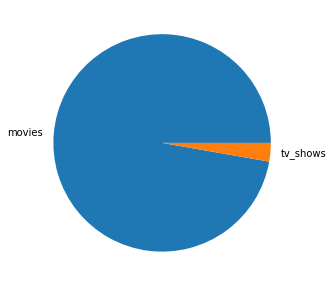

In [44]:
# Distribution Pie
movies_c = len(movies)
tv_shows_c = len(tv_shows)

plt.figure(figsize= (10,5))
labels = ['movies', 'tv_shows']
plt.pie([movies_c, tv_shows_c], labels=labels)

#### Content Age Ratings Distribution

In [45]:
# Seperating data into ratings 
ratings = [len(df.loc[df['rating']== 'TV-14']), len(df.loc[df['rating']== 'PG-13']), len(df.loc[df['rating']== 'PG']), len(df.loc[df['rating']== 'R']),
           len(df.loc[df['rating']== 'TV-PG']), len(df.loc[df['rating']== 'G']), len(df.loc[df['rating']== 'TV-Y7']), len(df.loc[df['rating']== 'TV-G']),
           len(df.loc[df['rating']== 'TV-Y']),len(df.loc[df['rating']== 'NC-17']), len(df.loc[df['rating']== 'NR']), len(df.loc[df['rating']== 'TV-Y7-FV']), 
           len(df.loc[df['rating']== 'UR'])]

total = len(df)
ratings_name = ['TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7', 'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

In [46]:
ratings_ordered = np.sort(ratings)[::-1]
list(ratings_ordered)

[1214, 778, 470, 431, 275, 84, 76, 76, 58, 40, 3, 3, 2]

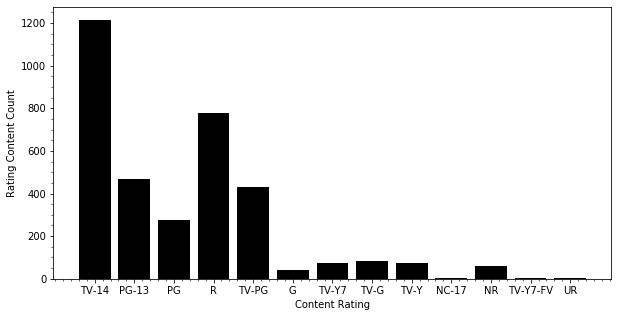

In [47]:
# Bar plots
plt.figure(figsize=(10,5))
plt.bar(ratings_name, ratings, color='black')

plt.xlabel('Content Rating')
plt.ylabel('Rating Content Count')
plt.minorticks_on()

### Common Movie Description

In [161]:
movies.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9


In [185]:
# We want to look at the description of the movies
# Since we want to tokenize the words, we need to convert the column into dtye: string

#This method allows you to convert the columns into one long string, as needed for the word_tokenize function
mov_desc = movies.listed_in.str.cat(sep=' ')

In [163]:
# Now that we have the column as one long string, we can tokenize the words
mov_desc_tokens = nltk.word_tokenize(mov_desc)
len(mov_desc_tokens)

26882

In [164]:
# Gathering frequency of token occurence
freq_m_d_t = FreqDist() # Variable to contain to function for this specific use

In [165]:
# Loop to count occurence of each token
for word in mov_desc_tokens:
    freq_m_d_t[word.lower()]+=1 # "+=1" - increases count of each occurence by 1
freq_m_d_t

FreqDist({',': 6306, 'movies': 4960, 'international': 2369, 'dramas': 2293, '&': 1895, 'comedies': 1553, 'action': 806, 'adventure': 806, 'independent': 740, 'romantic': 579, ...})

In [168]:
#Length of the unique values in the description 
len(freq_m_d_t)

29

Total tokens = 26,882, Unique tokens = 29

In [172]:
# Variable to store the top 'x' most common tokens
freq_mdt_t10 = freq_m_d_t.most_common(16)
freq_mdt_t10

[(',', 6306),
 ('movies', 4960),
 ('international', 2369),
 ('dramas', 2293),
 ('&', 1895),
 ('comedies', 1553),
 ('action', 806),
 ('adventure', 806),
 ('independent', 740),
 ('romantic', 579),
 ('thrillers', 547),
 ('children', 503),
 ('family', 503),
 ('documentaries', 391),
 ('horror', 336),
 ('stand-up', 294)]

We can focus on actual genres, the genres we're going to plot are:
    - Dramas : 2293
    - Comedy : 1553
    - Action : 806
    - Adventure : 806
    - Romantic : 579
    - Thrillers : 547
    - Family : 503
    - Documentaries : 391
    - Horror : 336
    - Stand-up : 294
We can ignore some of the values since they aren't genres...

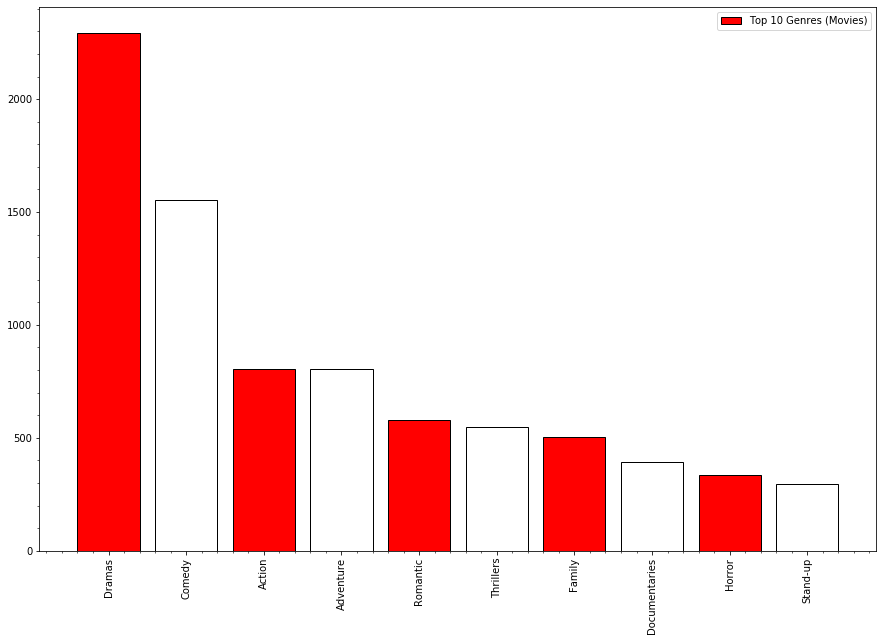

In [183]:
# Time to plot the top 10 genres
mov_genres_x = ['Dramas', 'Comedy', 'Action', 'Adventure', 'Romantic', 'Thrillers', 'Family', 'Documentaries', 'Horror', 'Stand-up']
mov_values_y = [2293,1553,806,806,579,547,503,391,336,294]
plt.figure(figsize=[15,10])

# Plotting the bar
bar_genre_freq10 = plt.bar(mov_genres_x, mov_values_y, 
                           label = 'Top 10 Genres (Movies)', color =['red','white'],
                          edgecolor=['black'])

plt.yticks()
plt.xticks(mov_genres_x, rotation= 'vertical')
plt.minorticks_on()

##Present Data
plt.legend()
plt.show(bar_genre_freq10)


## Recommendation System - NLTK

In this section we will be creating an algorithm that recommends movies and shows, relevant to what the viewer is watching.

In [ ]:
# Calling Movie & TV Show data
## We will only require some of the data here, so we'll slice it further
movies_cut = movies[['title','director','country','listed_in', 'description']]